In [1]:
import os
from dotenv import load_dotenv, find_dotenv
from os.path import join, dirname, basename, exists, isdir

### Load environmental variables from the project root directory ###
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

# now you can get the variables using their names

# Check whether a network drive has been specified
DATABASE = os.environ.get("NETWORK_URL")
if DATABASE == 'None':
    pass
else:
    pass
    #mount network drive here

# set up directory paths
CURRENT_DIR = os.getcwd()
PROJ = dirname(dotenv_path) # project root directory

DATA = join(PROJ, 'data') #data directory
RAW_EXTERNAL = join(DATA, 'raw_external') # external data raw directory
RAW_INTERNAL = join(DATA, 'raw_internal') # internal data raw directory
INTERMEDIATE = join(DATA, 'intermediate') # intermediate data directory
FINAL = join(DATA, 'final') # final data directory

RESULTS = join(PROJ, 'results') # output directory
FIGURES = join(RESULTS, 'figures') # figure output directory
PICTURES = join(RESULTS, 'pictures') # picture output directory


# make folders specific for certain data
folder_name = ''
if folder_name != '':
    #make folders if they don't exist
    if not exists(join(RAW_EXTERNAL, folder_name)):
        os.makedirs(join(RAW_EXTERNAL, folder_name))

    if not exists(join(INTERMEDIATE, folder_name)):
        os.makedirs(join(INTERMEDIATE, folder_name))

    if not exists(join(FINAL, folder_name)):
        os.makedirs(join(FINAL, folder_name))


print('Standard variables loaded, you are good to go!')

Standard variables loaded, you are good to go!


In [2]:
# import result data 

In [6]:
import os 
import pandas as pd
import numpy as np
FINAL = '/Users/jonas/Documents/masters/thesis/thesis/data_science/data/final/'
paths_to_data = [FINAL + 'go_analysis/' + i for i in os.listdir(FINAL + 'go_analysis/')]

paths_to_data
list_of_data_objects = []
for i in paths_to_data:
    list_of_data_objects.append(pd.read_csv(i, delimiter='\t'))


In [7]:
# creating a list of all biological processes
bp = []
[bp.extend(list(list_of_data_objects[i][list_of_data_objects[i]["NS"] == "BP"]["name"])) \
     for i in range(0,len(list_of_data_objects))]
bp = set(bp)

# creating the corresponding matrix
bp_matrix = []
for i in list_of_data_objects:
    true_false = []
    for j in bp:
        if( j in list(i["name"])):
            true_false.append(1)
        else:
            true_false.append(0)
    bp_matrix.append(true_false)
bp_matrix = np.array(bp_matrix).T

# 
cc = []
[cc.extend(list(list_of_data_objects[i][list_of_data_objects[i]["NS"] == "CC"]["name"])) \
     for i in range(0,len(list_of_data_objects))]
cc = set(cc)

# creating the corresponding matrix
cc_matrix = []
for i in list_of_data_objects:
    true_false = []
    for j in cc:
        if( j in list(i["name"])):
            true_false.append(1)
        else:
            true_false.append(0)
    cc_matrix.append(true_false)
cc_matrix = np.array(cc_matrix).T

In [14]:
# creating a list of all biological processes
bp = []
[bp.extend(list(list_of_data_objects[i][list_of_data_objects[i]["NS"] == "BP"]["name"])) \
     for i in range(0,len(list_of_data_objects))]
bp = set(bp)

# creating the corresponding matrix
bp_matrix = []
for i in list_of_data_objects:
    true_false = []
    for j in bp:
        if( j in list(i["name"])):
            true_false.append(1)
        else:
            true_false.append(0)
    bp_matrix.append(true_false)
bp_matrix = np.array(bp_matrix).T

# 
mf = []
[mf.extend(list(list_of_data_objects[i][list_of_data_objects[i]["NS"] == "MF"]["name"])) \
     for i in range(0,len(list_of_data_objects))]
mf = set(mf)

# creating the corresponding matrix
mf_matrix = []
for i in list_of_data_objects:
    true_false = []
    for j in mf:
        if( j in list(i["name"])):
            true_false.append(1)
        else:
            true_false.append(0)
    mf_matrix.append(true_false)
mf_matrix = np.array(mf_matrix).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

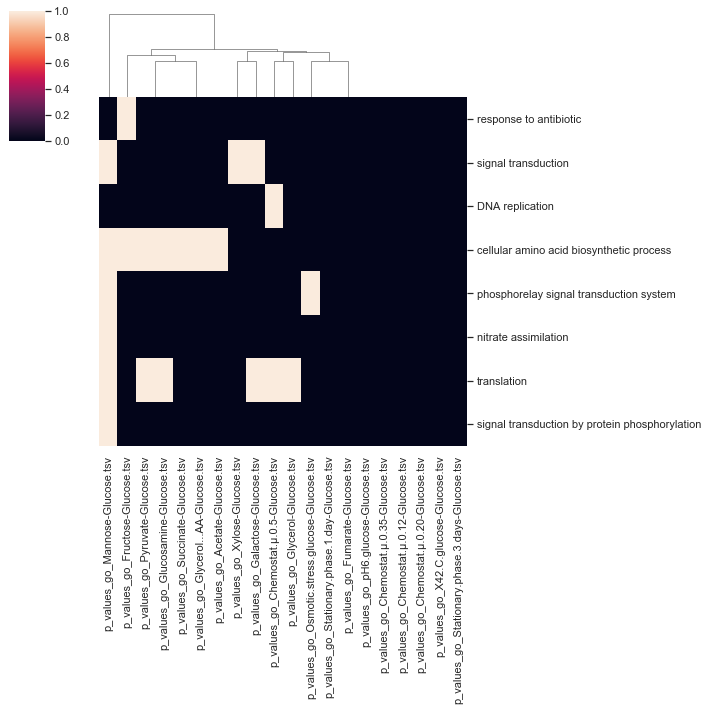

In [16]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

# biological process heatmap
ax = sns.clustermap(bp_matrix,row_cluster=False, xticklabels=os.listdir(FINAL + 'go_analysis/'), yticklabels=bp)
bp_matrix

array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]])

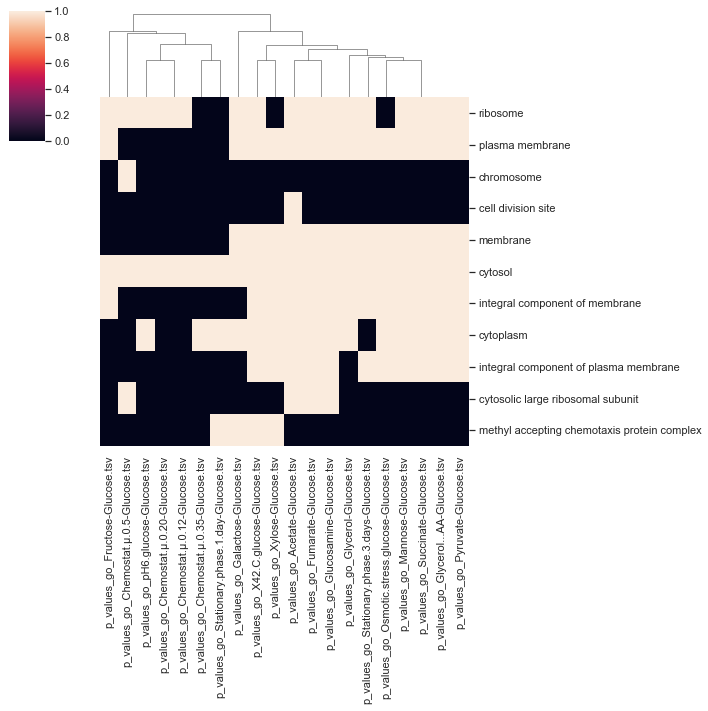

In [17]:
# compartment heatmap
ax = sns.clustermap(cc_matrix,row_cluster=False, xticklabels=os.listdir(FINAL + 'go_analysis/'), yticklabels=cc)
cc_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

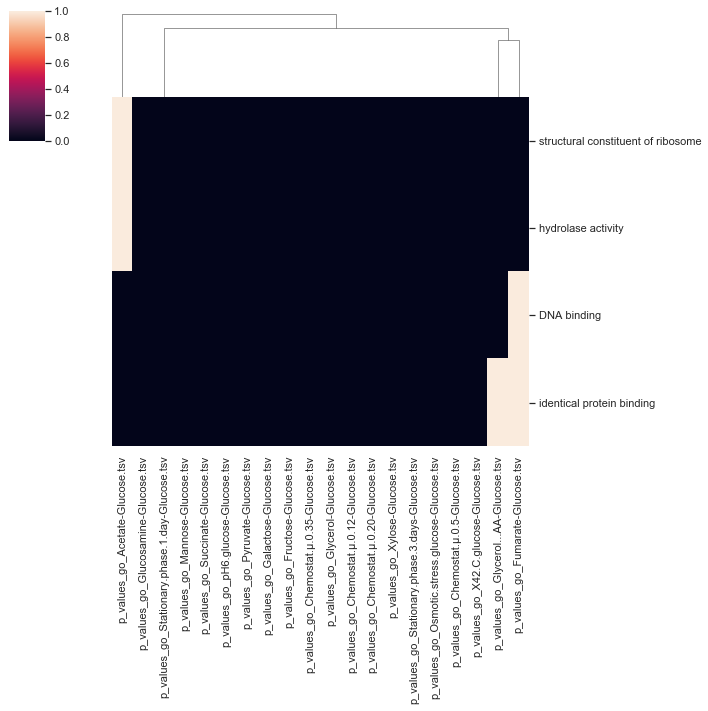

In [18]:
ax = sns.clustermap(mf_matrix,row_cluster=False, xticklabels=os.listdir(FINAL + 'go_analysis/'), yticklabels=mf)
mf_matrix